# Standby consumption analysis

OpenGrid has a standby consumption analysis. This analysis will extract the minimum consumption during a specified period of the day. By default, the minimum over the entire day is found, but the method can be tuned to analyse eg. only the night. 

### Imports and loading data

In [1]:
import opengrid as og
import pandas as pd

In [2]:
plt = og.plot_style()

For a correct standby power analysis **we need high-resolution data, eg. minute-values**.  With hourly values we would often overestimate the real standby power as fridges, freezers or other intermittent short loads are included in the hourly consumption measure.  

In this demo we use electricity consumption data with 1-minute resolution for a single sensor. First, we load the dataframe and make a quick plot to show the data.

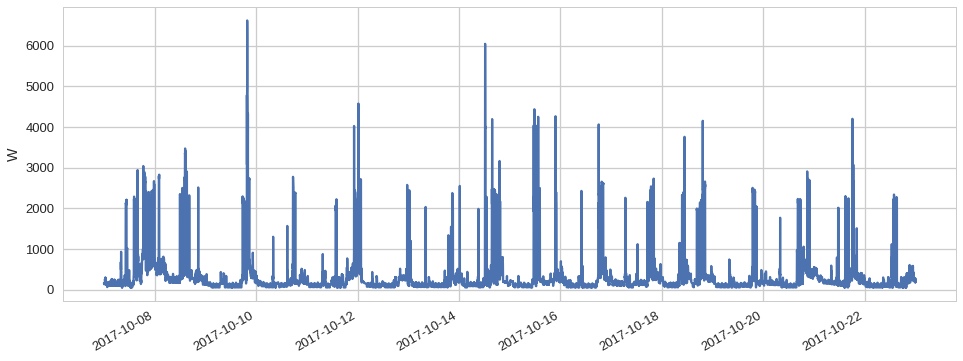

In [3]:
ts = og.datasets.get('elec_power_min_1sensor')
ax = ts.plot()
fig = ax.set_ylabel('W')

### Compute standby power

By default, the daily standby power consumption is the daily minimum electric power. However, we can tune the function with some optional arguments: 
* resolution: instead of daily, you can specify a different sampling resolution
* time_window: if you only want to consider specific hours of the day (for example: the night) you can set a start and end time

In [4]:
standby_all = og.analysis.standby(ts) # returns a pandas Series
standby_night = og.analysis.standby(ts, time_window=('00:00', '06:00'))

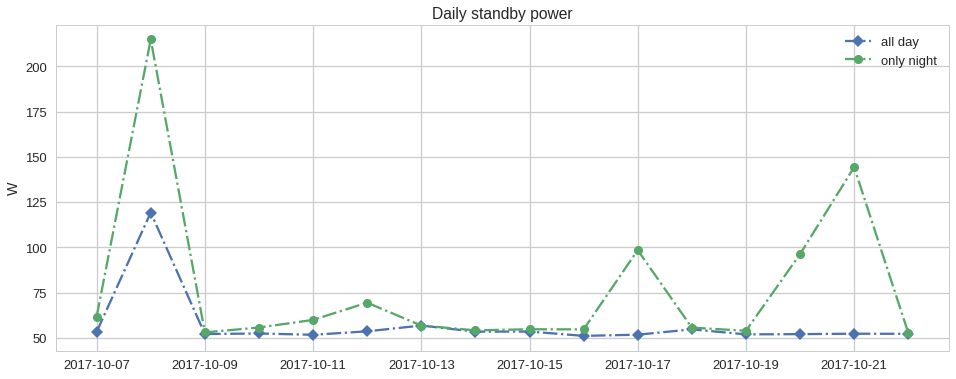

In [5]:
fig = plt.plot(standby_all.index, standby_all.values, marker='D', linestyle='-.', label='all day')
plt.plot(standby_night.index, standby_night.values, marker='o', linestyle='-.', label='only night')
plt.legend()
plt.title('Daily standby power')
_ = fig[0].axes.set_ylabel('W')

In [6]:
print("The mean daily standby power is {:.1f} W".format(standby_all.mean()))
print("The minimum daily standby power is {:.1f} W".format(standby_all.min()))

The mean daily standby power is 57.0 W
The minimum daily standby power is 51.1 W


### Interpretation

From the results we can see that the daily standby power is lower than 60 W on all days except the 8th of October. This is a low value, most dwellings will have a higher standby power. The increased standbly power on the 8th of October is caused by **equipment (typically lighting) not being turned off as excpected**. 

We can now compute the share of the standby consumption in the total electricity consumption over this period with the OpenGrid method *share_of_standby*.

In [7]:
share_standby = og.analysis.share_of_standby(ts)
print("Standby power: {:.1%} of total consumption.".format(share_standby))

Standby power: 17.3% of total consumption.


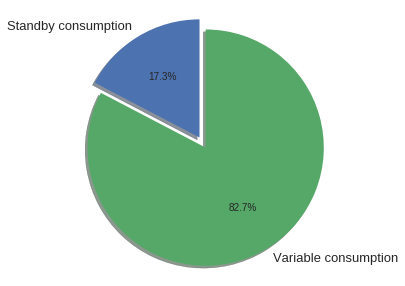

In [8]:
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie([share_standby, 1-share_standby], 
        explode=(0.1, 0), 
        labels=['Standby consumption', 'Variable consumption'], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)
_ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.